In [96]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse

In [97]:
real = pd.read_csv("project_data/training_data.csv",index_col=0)
pred = pd.read_csv("Position_estimation.csv",index_col=0)
real = real.loc[:,['pos_x', 'pos_y', 'pos_z']]

In [182]:
def RMSE(Actual, Predicted, plot=False):
    """ Function to calculate the root mean square error from data matrix"""
    if Actual.shape != Predicted.shape:
        raise TypeError('Matrix sizes must agree')
    
    null = Predicted.isnull()
    
    if any(null):
        I = pd.isnull(Predicted).any(1).to_numpy().nonzero()
        idx = I[:][:]
        Actual.iloc[idx] = np.nan
        act = Actual.dropna()
        est = Predicted.dropna()
    else:
        act = Actual
        est = Predicted
        
    rmse = np.sqrt(mse(act, est), dtype=np.float32)
    print('RMSE = {:.9f}metres'.format(rmse))
    
    if plot:
        import matplotlib.pyplot as plt
        
        Err = (act.pos_x - est.Estimated_x + act.pos_y - est.Estimated_y + act.pos_z - est.Estimated_z)
        
        x = act.index
        plt.figure(1,figsize=(17,4))

        plt.subplot(131)
        plt.plot(x, act.pos_x, 'r-',  x, est.Estimated_x, 'b-',linewidth=1.0)
        plt.legend(['Real x', 'Estimated x'], loc=1)
        plt.ylabel('Position (m)')
        #
        plt.subplot(132)
        plt.plot(x, act.pos_y, 'r-',  x, est.Estimated_y, 'b-',linewidth=1.0)
        plt.legend(['Real y', 'Estimated y'], loc=1)
        plt.ylabel('Position (m)')
        #
        plt.subplot(133)
        plt.plot(x, act.pos_z, 'r-',  x, est.Estimated_z, 'b-',linewidth=1.0)
        plt.legend(['Real z', 'Estimated z'], loc=1)
        plt.ylabel('Position (m)')
        
        plt.suptitle('Actual vs. Estimated Positions')
        
        
        
        plt.figure(2,figsize=(8,5))
        plt.stem(Err)
        plt.title('Image pair errors')
        plt.ylabel('Error (m)')
        plt.xlabel('Image pair')
        plt.grid(True)
    

RMSE = 0.004583842metres


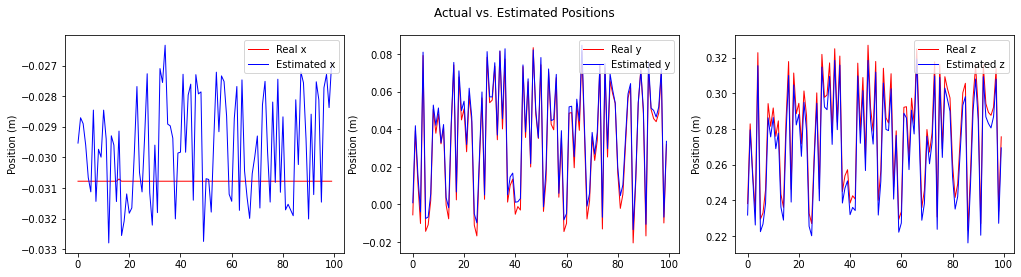

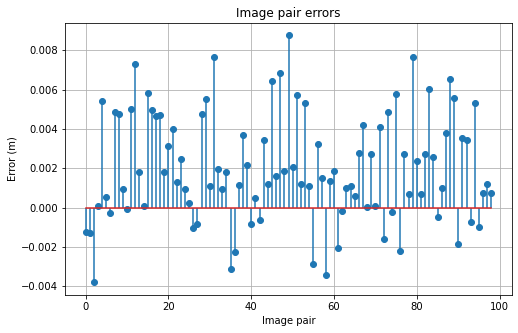

In [183]:
RMSE(real, pred, plot=True)